In [1]:
import os
import shutil
import pandas as pd
import numpy as np
import math
import cv2
import torch, torchvision
from PIL import Image
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

In [2]:
data_path = '/datasets/UAV/34_Competition 1_Training dataset/Training dataset'
data_path = '/datasets/UAV/34_Competition 1_public testing dataset'
data_path = '/datasets/UAV/34_Competition 1_Private Test Dataset'
train_path = f'{data_path}/img'
label_path = f'{data_path}/label_img'


df = pd.read_csv('train_34.csv')
df = pd.DataFrame({'label': os.listdir(label_path)})
df

,label
0,PRI_RI_1000302.png
1,PRI_RO_1000620.png
2,PRI_RO_1000636.png
3,PRI_RI_1000355.png
4,PRI_RI_1000303.png
...,...
715,PRI_RO_1000541.png
716,PRI_RO_1000368.png
717,PRI_RO_1000501.png
718,PRI_RI_1000338.png


In [3]:
t = [
    np.zeros((10, 1, 2)),
    np.zeros((20, 1, 2))
]
np.vstack(t).shape

(30, 1, 2)

PRI_RI_1000261.png (256, 256, 3) [  0 255] 7130


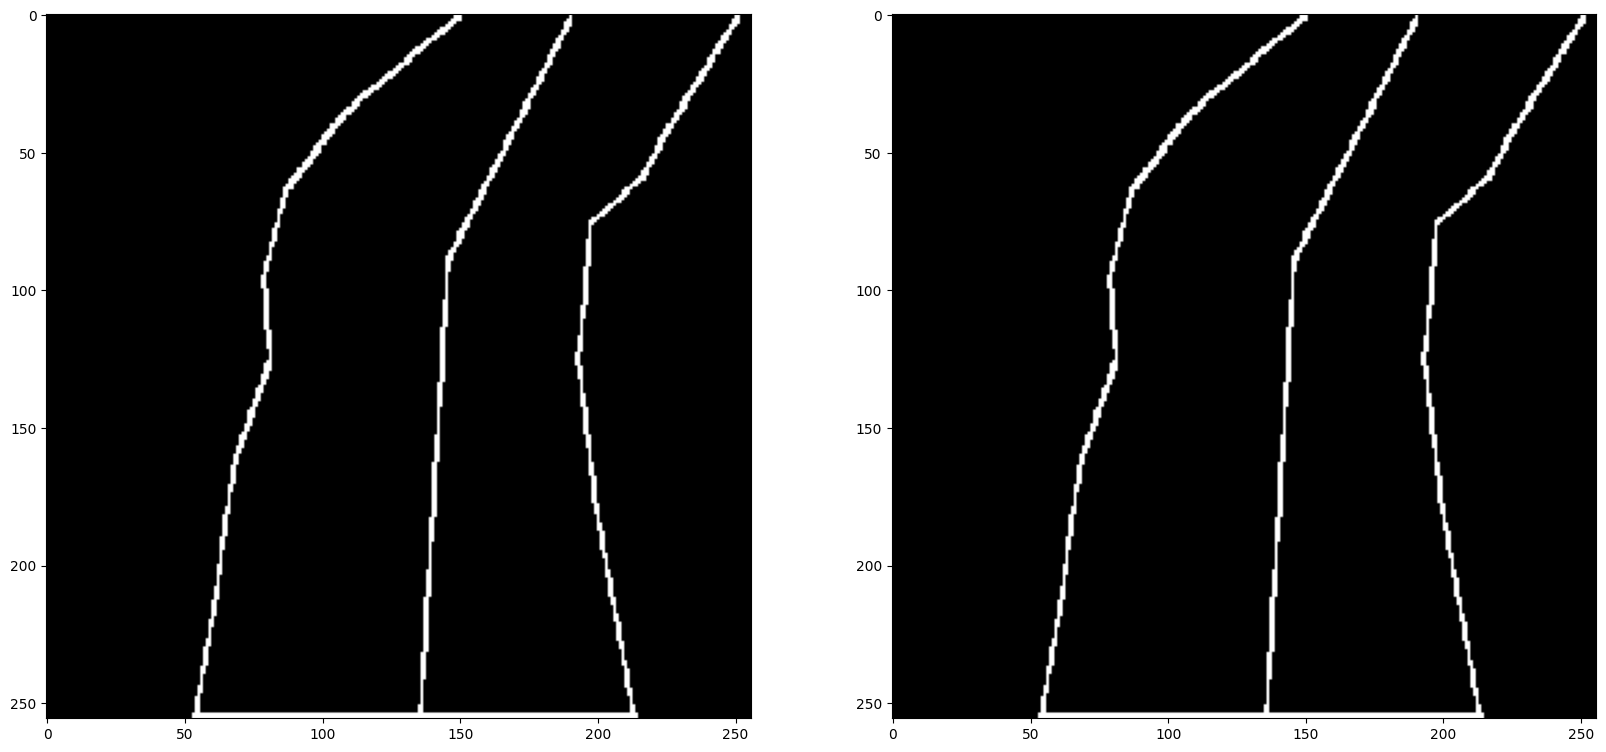

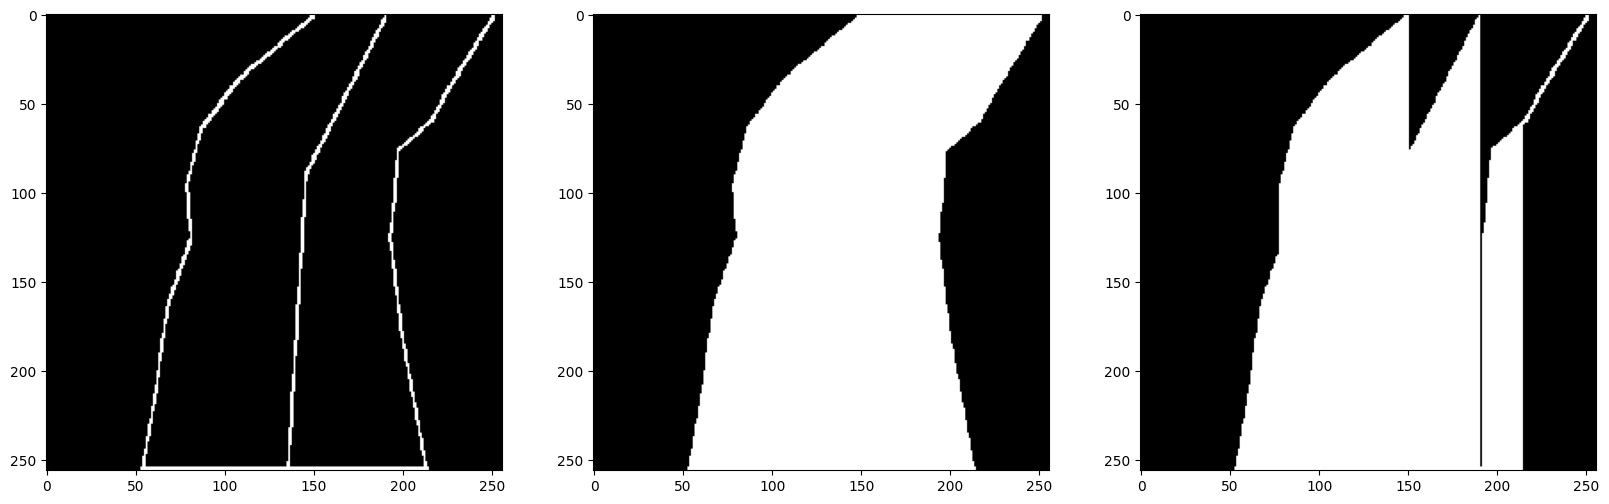

PRI_RI_1000260.png (256, 256, 3) [  0 255] 17504


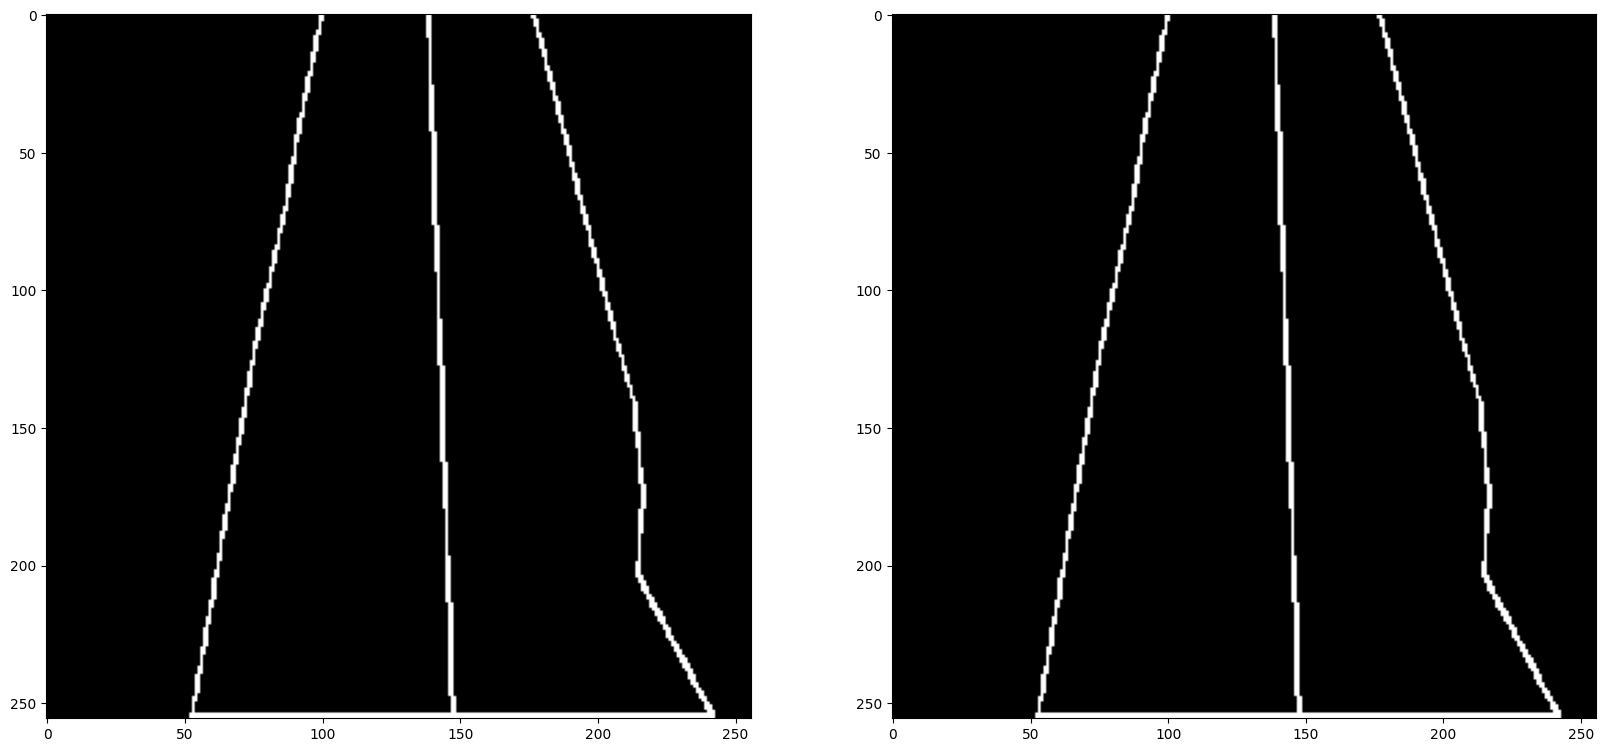

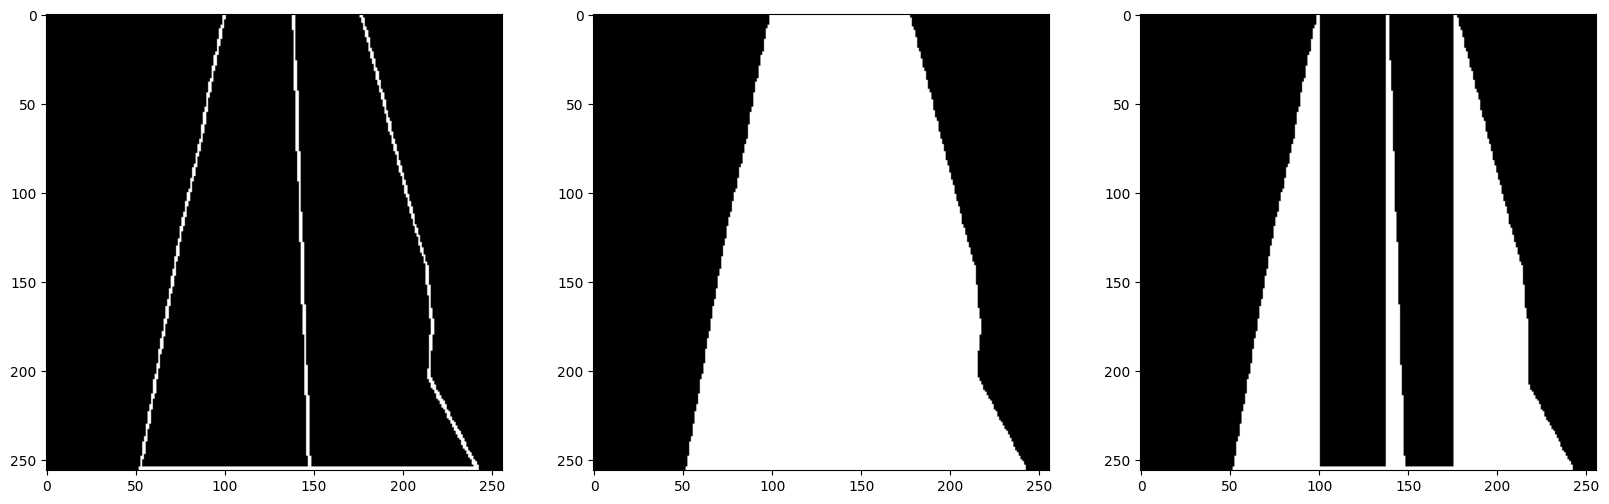

503    None
649    None
dtype: object

In [3]:
def show(row):
    path = f"{label_path}/{row['label']}"
    img = cv2.imread(path)
    img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_NEAREST)
    height, width, _ = img.shape

    channel_map_1 = img[:, :, 0].copy()
    channel_map_2 = channel_map_1.copy()
    channel_map_3 = channel_map_1.copy()
    channel_map_4 = channel_map_1.copy()
    idx_255 = np.argwhere(channel_map_1 == 255)

    for r in range(height):
        indices = idx_255[idx_255[:, 0] == r]
        if len(indices) == 1:
            channel_map_1[r, indices[0, 1]] = 255
        if len(indices) >= 2:
            channel_map_1[r, indices[:, 1].min(): indices[:, 1].max() + 1] = 255

    for c in range(width):
        indices = idx_255[idx_255[:, 1] == c]
        if len(indices) == 1:
            channel_map_2[indices[0, 0], c] = 255
        if len(indices) >= 2:
            channel_map_2[indices[:, 0].min(): indices[:, 0].max() + 1, c] = 255
    
    contours, hierarchy = cv2.findContours(channel_map_3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    result1 = cv2.drawContours(channel_map_3, contours, -1, 255, -1)

    result2 = np.zeros(channel_map_3.shape, np.uint8)
    for contour in contours:
        result2 = cv2.fillConvexPoly(result2, contour, 255)

    polygon = Polygon(np.squeeze(contours[0]))


    print(row['label'], img.shape, np.unique(img), (channel_map_1 != channel_map_2).sum())
    fig = plt.figure(figsize=(20, 10))
    plt.subplot(121)
    plt.imshow(img)
    plt.subplot(122)
    plt.imshow(np.stack([result1] * 3, axis=-1))
    plt.show()

    fig = plt.figure(figsize=(20, 10))
    plt.subplot(131)
    plt.imshow(img)
    plt.subplot(132)
    plt.imshow(np.stack([channel_map_1] * 3, axis=-1))
    plt.subplot(133)
    plt.imshow(np.stack([channel_map_2] * 3, axis=-1))
    # plt.subplot(235)
    # plt.imshow(np.stack([channel_map_3, channel_map_3, channel_map_3], axis=-1))
    plt.show()


# df.sample(5, random_state=42).apply(lambda x: show(x), axis=1)
# df.sample(5).apply(lambda x: show(x), axis=1)
wired = [
    'TRA_RO_1003852.png',
    'TRA_RO_1002694.png',
    'PRI_RI_1000260.png',
    'PRI_RI_1000261.png',
]
df[df['label'].isin(wired)].apply(lambda x: show(x), axis=1)